In [94]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Read CSV file
df = pd.read_csv('laptop_data.csv')

In [96]:
# Top 5 rows
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [97]:
# Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


**Data Cleaning**

In [98]:
# Check Missing Values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [99]:
# Import warning
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Check Duplicate
df.duplicated().sum()

np.int64(0)

In [101]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [102]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [103]:
# Extract New Feature "Width" and "Hight" from "ScreenResolution"
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df.drop('ScreenResolution',axis=1,inplace=True)

In [104]:
df['Brand'] = df['Cpu'].str.extract(r'^(Intel|AMD)')

# Extract series (Core i5, Core i7, Atom, etc.)
df['Series'] = df['Cpu'].str.extract(r'(Core\s\w+|Atom|A9-Series|Core\sM\s\w+)')

# Extract model number (if present)
df['Model'] = df['Cpu'].str.extract(r'(\d{4}[A-Z]*\d*)')

# Extract clock speed
df['ClockSpeed'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz').astype(float)

df.drop('Cpu',axis=1,inplace=True)

In [105]:
df.head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,Brand,Series,Model,ClockSpeed
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,Intel,Core i5,NaN,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,Intel,Core i5,NaN,1.8


In [106]:
# Create fucntion to handle to replace "TB" into numerical GB 
def simple_converter(value):
    if isinstance(value, str):
        value = value.replace('1TB', '1000GB')
        value = value.replace('2TB', '2000GB')
        value = value.replace('1.0TB', '1000GB')  # handles '1.0TB' too
        value = value.replace('2.0TB', '2000GB')
    return value

In [107]:
df['Memory'] = df['Memory'].apply(simple_converter)

In [108]:
df.isnull().sum()

Company        0
TypeName       0
Inches         0
Ram            0
Memory         0
Gpu            0
OpSys          0
Weight         0
Price          0
Width          0
Height         0
Brand          1
Series        50
Model         46
ClockSpeed     0
dtype: int64

In [109]:
# Fill missing values of "Model", "Brand", "Series" with mode
df['Model'].fillna('7200U',inplace=True)
df['Brand'].fillna(df['Brand'].mode()[0],inplace=True)
df['Series'].fillna(df['Series'].mode()[0],inplace=True)

In [110]:
df.head(3)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,Brand,Series,Model,ClockSpeed
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,Intel,Core i5,7200U,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,Intel,Core i5,7200U,1.8
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,Intel,Core i5,7200U,2.5


**Exploratory Data Analysis**

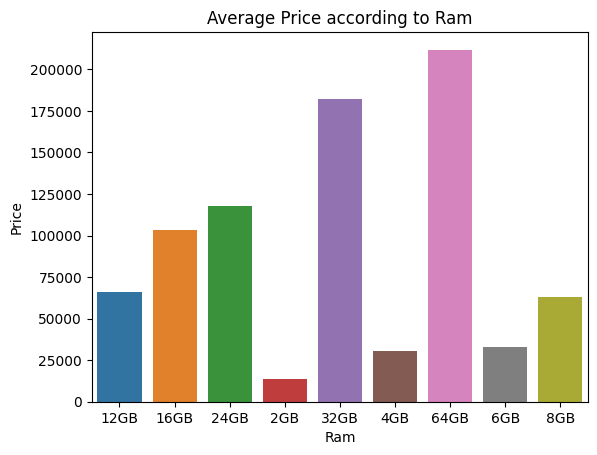

In [111]:
var = df.groupby('Ram')['Price'].mean().reset_index()
sns.barplot(x='Ram', y='Price',hue='Ram', data=var)
plt.title('Average Price according to Ram')
plt.show()

In [112]:
# Check min, max and mean price of different company laptop
df.groupby(['Company','Brand'])['Price'].agg([min,max,'mean'])

min          max           mean
Company   Brand                                         
Acer      AMD     20619.3600   35111.5200   24636.672000
          Intel    9270.7200  138474.7200   34336.330374
Apple     Intel   47895.5232  152274.2400   83340.499886
Asus      AMD     10602.7200  117162.7200   47051.035200
          Intel   10224.4320  211788.0000   59711.573780
Chuwi     Intel   13053.0672   23922.7200   16745.726400
Dell      Intel   14646.6720  194972.8320   63193.755782
Fujitsu   Intel   34578.7200   42570.7200   38841.120000
Google    Intel   67932.0000  117162.7200   89386.080000
HP        AMD     13746.2400   34898.9328   25702.378560
          Intel   11135.5200  233845.9200   60022.436357
Huawei    Intel   71874.7200   79866.7200   75870.720000
LG        Intel  101178.7200  122490.7200  111834.720000
Lenovo    AMD     15877.4400   53226.7200   27844.028100
          Intel   12201.1200  261018.7200   59592.942423
MSI       Intel   44701.9200  149130.7200   92116.226133
Mediacom  Intel   12733.9200   20725.9200   15717.600000
Microsoft Intel   52693.9200  137941.9200   85903.788000
Razer     Intel   54825.1200  324954.7200  178282.491429
Samsung   Intel   14332.3200   98514.7200   75308.320000
Toshiba   Intel   23816.1600  149130.7200   67549.050000
Vero      Intel   10442.8800   13852.8000   11584.404000
Xiaomi    Intel   49816.8000   74589.3360   60390.882000

In [113]:
# Count total products of all company
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

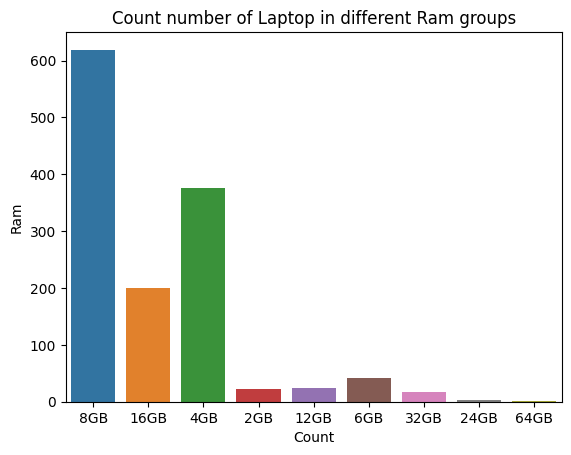

In [114]:
sns.countplot(x='Ram',hue='Ram',data=df)
plt.title('Count number of Laptop in different Ram groups')
plt.xlabel('Count')
plt.ylabel('Ram')
plt.show()

In [115]:
df.head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,Brand,Series,Model,ClockSpeed
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,Intel,Core i5,7200U,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,Intel,Core i5,7200U,1.8


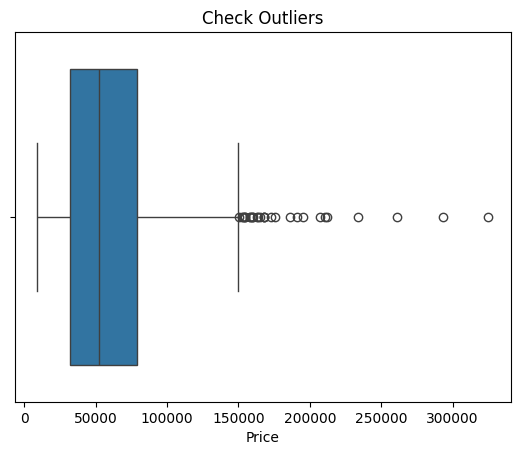

In [116]:
sns.boxplot(x='Price',data=df)
plt.title('Check Outliers')
plt.show()

In [117]:
df.describe()

,Inches,Price,Width,Height,ClockSpeed
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,59870.042910,1894.784344,1070.830391,2.298772
std,1.426304,37243.201786,494.641028,284.519410,0.506340
min,10.100000,9270.720000,1366.000000,768.000000,0.900000
25%,14.000000,31914.720000,1600.000000,900.000000,2.000000
50%,15.600000,52054.560000,1920.000000,1080.000000,2.500000
75%,15.600000,79274.246400,1920.000000,1080.000000,2.700000
max,18.400000,324954.720000,3840.000000,2160.000000,3.600000


We cannot remove outliers directly because Model is about Price Prediction

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Split data into input(x) and output(y)
x = df.drop(['Price'],axis=1)
y = df['Price']

In [120]:
# Set training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
# Import Some algorithms and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [122]:
# Seperate numerical and categorical feature
num_feature = ['Inches','Width','Height','ClockSpeed']
cat_feature = ['Company','TypeName']

In [123]:
num_encode = Pipeline([
    ('transformer', StandardScaler()) # Transformer on numerical feature
])
cat_encode = Pipeline([
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Oridnal Encoder on Categorical feature    
])

In [124]:
# This ColumnTransformer applies different preprocessing pipelines to numerical and categorical features separately
preprocessing = ColumnTransformer([
    ('num',num_encode,num_feature), 
    ('cat', cat_encode,cat_feature)
])

In [ ]:
# Make final pipeline
pipe = Pipeline([
    ('prep', preprocessing),
    ('model', RandomForestRegressor(n_estimators=160,max_depth=5))
])

In [126]:
# Fit Pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transformer',
                                                                   StandardScaler())]),
                                                  ['Inches', 'Width', 'Height',
                                                   'ClockSpeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Company', 'TypeName'])])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=160))])

In [127]:
# Check score
pipe.score(x_test,y_test)*100, pipe.score(x_train,y_train)*100

(67.42860718776423, 71.81873412655975)

HyperParameter Tunning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param = {
    "max_depth" : [2,4,6,8,10],
    "n_estimators" : [70,90,120,140],
    "min_samples_split" : [2,4,6,8]
}

In [140]:
grid = GridSearchCV(RandomForestRegressor(),param_grid=param,cv=2)

Check mean_squared_error, mean_absolute_error, r2_score

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
y_pred = pipe.predict(x_test)
score = mean_squared_error(y_test,y_pred)
print(score)

469640623.02169704


In [130]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.6742860718776422


Check Cross validation score

In [131]:
from sklearn.model_selection import cross_val_score, KFold

In [132]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)
scores = cross_val_score(pipe, x, y, cv=kf, scoring='r2')
print("Scores:",scores)

Scores: [0.68468702 0.59125605 0.67312809 0.6542273  0.63837215 0.72582502
 0.57594672 0.65982849]


Create Dataframe for prediction

In [133]:
data = pd.DataFrame({
    'Company': ['Apple'],
    'TypeName':  ['Ultrabook'],
    'Inches' :  [13.3],
    'Ram' : ['8GB'],
    'Memory' : ['128GB SSD'],
    'Gpu' : ['Intel Iris Plus Graphics 640'],
    'OpSys' : ['macOS'],
    'Width'  : [2560],
    'Height'  : [1600],
    'Brand'	: ['Inter'],
    'Series' : ['Core i5'],
    'Model' : ['7200U'],
    'ClockSpeed': [2.3]
})

In [136]:
# Prediction
pipe.predict(data)

array([77086.25648651])